In [1]:
import tensorflow as tf
from tensorflow import keras

2025-08-28 10:20:12.773006: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-28 10:20:12.925456: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-28 10:20:12.932752: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-28 10:20:15.566335: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
!wget https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats-model/dogs_cats_10_0.687.h5 -O dogs-vs-cats.h5

--2025-08-28 10:20:47--  https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats-model/dogs_cats_10_0.687.h5
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/426348925/f4f8406c-b1cd-4377-94a0-8a89b6f826bd?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-28T09%3A03%3A15Z&rscd=attachment%3B+filename%3Ddogs_cats_10_0.687.h5&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-28T08%3A03%3A07Z&ske=2025-08-28T09%3A03%3A15Z&sks=b&skv=2018-11-09&sig=hyBC%2BQilX1ebz1JjmB%2FuQw10sn04SyafGfQ1KD6xivI%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NjM2OTU0OCwibmJmIjoxNzU2MzY5MjQ4LCJwYXRoIjo

In [5]:
model = keras.models.load_model('dogs-vs-cats.h5')

2025-08-28 10:20:50.908315: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.
2025-08-28 10:20:50.933651: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.
2025-08-28 10:20:50.945680: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.
2025-08-28 10:20:51.251132: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.
2025-08-28 10:20:51.318893: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.


In [10]:
!ls -lh dogs-vs-cats.h5

-rw-rw-r-- 1 jigar jigar 86M Dec  8  2021 dogs-vs-cats.h5


In [8]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('dogs-vs-cats.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpyctytw8v/assets


INFO:tensorflow:Assets written to: /tmp/tmpyctytw8v/assets
2025-08-28 10:24:03.501139: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-08-28 10:24:03.501184: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-28 10:24:03.503802: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpyctytw8v
2025-08-28 10:24:03.504964: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2025-08-28 10:24:03.504983: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpyctytw8v
2025-08-28 10:24:03.509361: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2025-08-28 10:24:03.512066: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2025-08-28 10:24:03.838128: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

In [9]:
!ls -lh dogs-vs-cats.tflite

-rw-rw-r-- 1 jigar jigar 43M Aug 28 10:24 dogs-vs-cats.tflite


In [11]:
import tensorflow.lite as tflite

In [13]:
interpreter = tflite.Interpreter(model_path='dogs-vs-cats.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [14]:
output_index

13

In [29]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    headers = {"User-Agent": "Mozilla/5.0"}  # pretend to be a browser
    req = request.Request(url, headers=headers)
    with request.urlopen(req) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img

def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

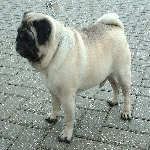

In [30]:
img = download_image('https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg')
img = prepare_image(img, target_size=(150, 150))
img

In [31]:
import numpy as np

In [32]:
def prepare_input(x):
    return x / 255.0

In [33]:
x = np.array(img, dtype='float32')
X = np.array([x])
X = prepare_input(X)

In [34]:
X[0, 0, 0, 0]

0.7058824

In [37]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)

In [38]:
preds

array([[0.76991]], dtype=float32)